# Machine Learning Pipeline Project

## Loading the Dataset

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pickle
import requests
import wget
import matplotlib.pyplot as plt

In [ ]:
def load_coursework_data():
    import wget
    path_to_check = os.path.join('', 'image_recognition_dataset.pth')
    if not os.path.exists(path_to_check):
        print("Cannot find the dataset on local !")
        print("Downloading the dataset from cloud, it may take several mintues.")
        url = 'https://www.dropbox.com/s/j05hyf667ikzu4s/image_recognition_dataset.pth?dl=1'
        filename = wget.download(url)
        data_path = os.path.join('', filename)
    else:
        print("Data founded on local {:s}".format(path_to_check))
        data_path = path_to_check
        
    data = pickle.load(open(data_path, 'rb'))
    train_imgs,train_labels,test_imgs,test_labels = data.values()
    return train_imgs,train_labels,test_imgs,test_labels

In [ ]:
train_imgs,train_labels,test_imgs,test_labels = load_coursework_data()

Data founded on local image_recognition_dataset.pth


## Data visualization and statistics of dataset

The code below shows a brief description of the dataset below including the number different image classes, the amount of images available for training and testing and the overall shape of the training set.

In [ ]:
cls_train = len(np.unique(train_labels))
print("Total number of image classes : {:d}".format(cls_train))
print("Shape of training set", train_imgs.shape)

print("Training image count: ", train_imgs.shape[0])
print("Test image count: ", test_imgs.shape[0])

Total number of image classes : 8
Shape of training set (40000, 32, 32, 3)
Training image count:  40000
Test image count:  8000


The original full training set of 40000 images gotten from the dataset will be further broken down to a smaller training set of 35000 images and a validation set of 5000 images down below.

In [ ]:
#validation: 5k
#X_train: 35K 
#pixel normalisation to [0, 1]
# Could be classed as pre processing (normalization) This means to put the value between 0-1
valid_imgs, smaller_train_imgs = train_imgs[:5000] / 255., train_imgs[5000:] / 255.
valid_labels, smaller_train_labels = train_labels[:5000], train_labels[5000:]
test_imgs = test_imgs / 255.

In [ ]:
print("Original Full Training image count: ", train_imgs.shape[0])
print("Smaller Training image count: ", smaller_train_imgs.shape[0])
print("Validation image count: ", valid_imgs.shape[0])

Original Full Training image count:  40000
Smaller Training image count:  35000
Validation image count:  5000


The images below display examples unique photos and its labels that are included in the dataset. These are listed below:<br>
• <b>[0]</b>:airplane<br>
• <b>[1]</b>:car<br>
• <b>[2]</b>:bird<br>
• <b>[3]</b>:cat<br>
• <b>[4]</b>:deer<br>
• <b>[5]</b>:dog<br>
• <b>[6]</b>:frog<br>
• <b>[7]</b>:horse

In [ ]:
smaller_train_labels

array([[6],
       [1],
       [2],
       ...,
       [6],
       [1],
       [1]], dtype=uint8)

In [ ]:
class_names = ["airplane", "car", "bird", "cat", "deer",
               "dog", "frog", "horse"]

The figure below shows the first forty images and labels in the train dataset.

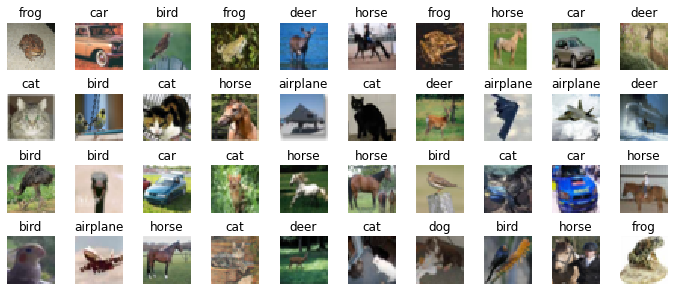

In [ ]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(smaller_train_imgs[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(smaller_train_labels[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

The figure below shows the first forty images and labels in the test dataset.

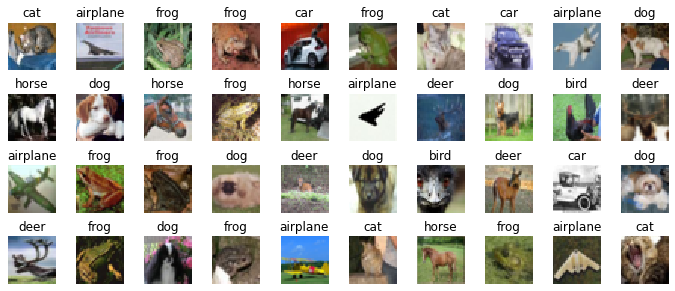

In [ ]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(test_imgs[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(test_labels[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

An example of an image in the form of an array is shown below, where each integer in the square brackets stands for the RGB values of a single image pixel.

In [ ]:
first_image = np.array(smaller_train_imgs[0])
first_image

array([[[0.46666667, 0.45882353, 0.4       ],
        [0.48235294, 0.47058824, 0.41960784],
        [0.48627451, 0.4745098 , 0.41568627],
        ...,
        [0.06666667, 0.0745098 , 0.05490196],
        [0.06666667, 0.0745098 , 0.05490196],
        [0.0627451 , 0.07058824, 0.05098039]],

       [[0.49803922, 0.49019608, 0.43921569],
        [0.51764706, 0.50588235, 0.45882353],
        [0.50196078, 0.48627451, 0.43529412],
        ...,
        [0.0745098 , 0.08235294, 0.0627451 ],
        [0.07058824, 0.07843137, 0.05882353],
        [0.06666667, 0.0745098 , 0.05490196]],

       [[0.52156863, 0.51372549, 0.46666667],
        [0.54117647, 0.53333333, 0.48627451],
        [0.5372549 , 0.5254902 , 0.47058824],
        ...,
        [0.08627451, 0.09411765, 0.0745098 ],
        [0.07843137, 0.08627451, 0.06666667],
        [0.08235294, 0.09019608, 0.07058824]],

       ...,

       [[0.81960784, 0.8       , 0.7372549 ],
        [0.79607843, 0.76862745, 0.70196078],
        [0.80392157, 0

Below shows the shape and size of each image in the dataset.

In [ ]:
print("Shape of image: ", first_image.shape)
print("Size of image: ", first_image.size)

Shape of image:  (32, 32, 3)
Size of image:  3072


## Experiments and result evaluation

When it comes to image classifiers there are various models to choose from to train this dataset.<br>These are:<br>
• MLP (Multilayer Perceptron)<br>
• Convolutional Neural Networks<br>
• Transfer Learning<br>
• SVM<br>


## Experiments with Multilayer Perceptron Model

### Multilayer Perceptron 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#define MLP  with 3 layers, each input is a flettened row 28x28 pixel values
#.Flatten(): conver each input image into 1D array, no parameters in this layer
# add layers one by one    

model_relu1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_relu1.layers

In [ ]:
model_relu1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 8)                 808       
                                                                 
Total params: 952,808
Trainable params: 952,808
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Layer type: 0: flatten, 1: dense 2: sdense_1 3: dense_3 
hidden1 = model_relu1.layers[1]
hidden1.name

'dense'

In [ ]:
#get the layer hidden1.name, and assign it to hidden1 
model_relu1.get_layer(hidden1.name) is hidden1

True

In [ ]:
#get the weights of the layer, save them to weights and biases 
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(3072, 300)

In [ ]:
#Small  numbers ~0 (normal/Gaussian distribution) 
weights

array([[-0.02479238,  0.00867877, -0.04030398, ..., -0.01142012,
         0.03683306, -0.00075505],
       [ 0.0378546 ,  0.0148434 , -0.02979763, ...,  0.02736208,
        -0.02307193,  0.03927105],
       [ 0.00179755, -0.0238618 ,  0.01595777, ...,  0.01255752,
         0.00476444,  0.03978629],
       ...,
       [ 0.01033041, -0.03315295,  0.02652311, ...,  0.03788012,
         0.0033493 ,  0.02773729],
       [-0.01456317,  0.03257196, -0.00615285, ..., -0.01987389,
        -0.00924341,  0.00565246],
       [-0.02658848, -0.03886216, -0.02913727, ..., -0.01801706,
         0.02332526,  0.00917124]], dtype=float32)

In [ ]:
biases.shape

(300,)

In [ ]:
#initialisation all to 0. 
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model_relu1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
import time

start_time = time.process_time()

history = model_relu1.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.7734 - accuracy: 0.3449 - val_loss: 1.6324 - val_accuracy: 0.4086
Epoch 2/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.5993 - accuracy: 0.4167 - val_loss: 1.5602 - val_accuracy: 0.4264
Epoch 3/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.5261 - accuracy: 0.4471 - val_loss: 1.4908 - val_accuracy: 0.4508
Epoch 4/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.4776 - accuracy: 0.4622 - val_loss: 1.4930 - val_accuracy: 0.4512
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4389 - accuracy: 0.4767 - val_loss: 1.4317 - val_accuracy: 0.4846
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4069 - accuracy: 0.4887 - val_loss: 1.4638 - val_accuracy: 0.4596
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3768 - accuracy: 0.4991 - val_loss: 1.4022 - val_accuracy:

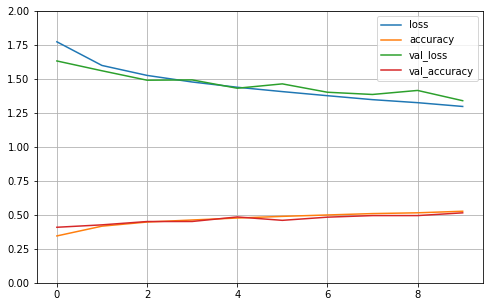

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_relu1.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.2616 - accuracy: 0.5384


[1.2616139650344849, 0.538428544998169]

In [ ]:
model_relu1.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.3443 - accuracy: 0.5066


[1.3443033695220947, 0.5066249966621399]

### Multilayer Perceptron with more Epochs

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model_1.fit(smaller_train_imgs, smaller_train_labels, epochs=20,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/20
1094/1094 [==============================] - 4s 3ms/step - loss: 1.9141 - accuracy: 0.2781 - val_loss: 1.8317 - val_accuracy: 0.3250
Epoch 2/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7904 - accuracy: 0.3529 - val_loss: 1.7482 - val_accuracy: 0.3712
Epoch 3/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7322 - accuracy: 0.3772 - val_loss: 1.7021 - val_accuracy: 0.3864
Epoch 4/20
1094/1094 [==============================] - 4s 3ms/step - loss: 1.6905 - accuracy: 0.3943 - val_loss: 1.6630 - val_accuracy: 0.4042
Epoch 5/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6588 - accuracy: 0.4072 - val_loss: 1.6373 - val_accuracy: 0.4154
Epoch 6/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6318 - accuracy: 0.4181 - val_loss: 1.6186 - val_accuracy: 0.4140
Epoch 7/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6098 - accuracy: 0.4269 - val_loss: 1.5937 - val_accuracy:

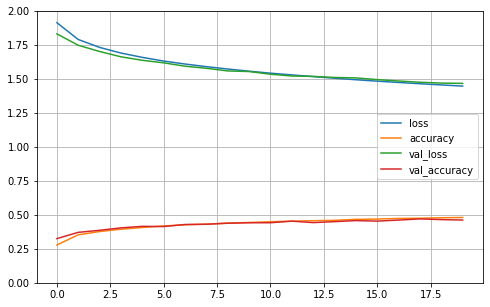

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_1.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.4442 - accuracy: 0.4819


[1.4441838264465332, 0.4819142818450928]

In [ ]:
model_1.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.4653 - accuracy: 0.4679


[1.465311884880066, 0.46787500381469727]

The accuracy in the training dataset was 48%, and the accuracy in the testing dataset is 47% with an MLP model set with reaction function of RELU, 3 hidden layers, and 20 epochs. The accuracy from 20 epochs is lower than the accuracy gotten from 10 epochs, this could be due to errors from vanishing and exploding gradients.

### Multilayer Perceptron with Leaky RELU and weight initializers

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_leakyrelu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_leakyrelu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model_leakyrelu.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.8888 - accuracy: 0.2931 - val_loss: 1.7963 - val_accuracy: 0.3390
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7544 - accuracy: 0.3675 - val_loss: 1.7100 - val_accuracy: 0.3908
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6999 - accuracy: 0.3908 - val_loss: 1.6687 - val_accuracy: 0.3984
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6640 - accuracy: 0.4063 - val_loss: 1.6371 - val_accuracy: 0.4156
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6363 - accuracy: 0.4155 - val_loss: 1.6183 - val_accuracy: 0.4172
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6130 - accuracy: 0.4247 - val_loss: 1.6048 - val_accuracy: 0.4210
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5950 - accuracy: 0.4312 - val_loss: 1.5828 - val_accuracy:

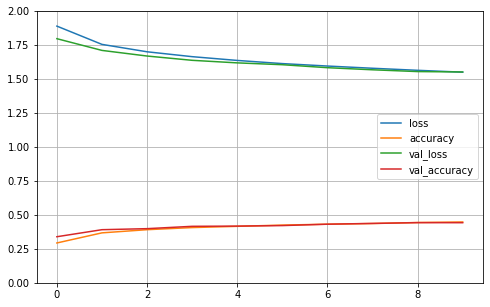

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_leakyrelu.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.5447 - accuracy: 0.4500


[1.5447120666503906, 0.45002856850624084]

In [ ]:
model_leakyrelu.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.5501 - accuracy: 0.4469


[1.550079584121704, 0.4468750059604645]

### Multilayer Perceptron with PRELU and weight initializers

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_prelu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_prelu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model_prelu.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.8919 - accuracy: 0.2952 - val_loss: 1.7995 - val_accuracy: 0.3414
Epoch 2/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.7567 - accuracy: 0.3659 - val_loss: 1.7109 - val_accuracy: 0.3894
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6974 - accuracy: 0.3904 - val_loss: 1.6669 - val_accuracy: 0.4008
Epoch 4/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.6568 - accuracy: 0.4091 - val_loss: 1.6301 - val_accuracy: 0.4152
Epoch 5/10
1094/1094 [==============================] - 5s 4ms/step - loss: 1.6249 - accuracy: 0.4197 - val_loss: 1.6079 - val_accuracy: 0.4184
Epoch 6/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.5984 - accuracy: 0.4287 - val_loss: 1.5891 - val_accuracy: 0.4286
Epoch 7/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.5773 - accuracy: 0.4369 - val_loss: 1.5666 - val_accuracy:

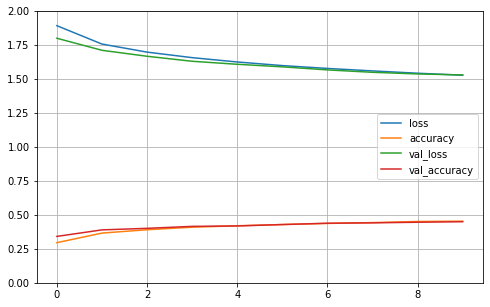

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_prelu.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 3ms/step - loss: 1.5206 - accuracy: 0.4568


[1.5206140279769897, 0.4568285644054413]

In [ ]:
model_prelu.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.5257 - accuracy: 0.4511


[1.5257108211517334, 0.45112499594688416]

### Multilayer Perceptron with SELU and weight initializers


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_selu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model_selu.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.8288 - accuracy: 0.3293 - val_loss: 1.7366 - val_accuracy: 0.3582
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6997 - accuracy: 0.3912 - val_loss: 1.6514 - val_accuracy: 0.4132
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6545 - accuracy: 0.4096 - val_loss: 1.6217 - val_accuracy: 0.4144
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6263 - accuracy: 0.4200 - val_loss: 1.6002 - val_accuracy: 0.4246
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6045 - accuracy: 0.4289 - val_loss: 1.5930 - val_accuracy: 0.4308
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5863 - accuracy: 0.4368 - val_loss: 1.5854 - val_accuracy: 0.4330
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5721 - accuracy: 0.4396 - val_loss: 1.5579 - val_accuracy:

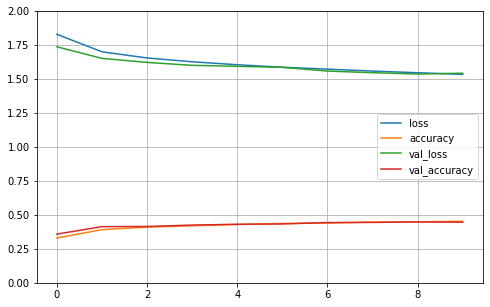

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_selu.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.5318 - accuracy: 0.4559


[1.5318000316619873, 0.45588570833206177]

In [ ]:
model_selu.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.5428 - accuracy: 0.4485


[1.5428119897842407, 0.44850000739097595]

The accuracy in the training dataset was 46%, and the accuracy in the testing dataset is 45% with an MLP model set with reaction function of SELU, 3 hidden layers, and 10 epochs. The accuracy with SELU is lower than the accuracy gotten from RELU activation function. In addition, the time taken to perform the epochs with SELU is longer than with the RELU activation function.

### Multilayer Perceptron with Nadam optimizer

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
model_nadam = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_nadam.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

In [ ]:
history = model_nadam.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 5s 4ms/step - loss: 1.7394 - accuracy: 0.3515 - val_loss: 1.6161 - val_accuracy: 0.3992
Epoch 2/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.5503 - accuracy: 0.4306 - val_loss: 1.4939 - val_accuracy: 0.4562
Epoch 3/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.4770 - accuracy: 0.4593 - val_loss: 1.4622 - val_accuracy: 0.4622
Epoch 4/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.4290 - accuracy: 0.4757 - val_loss: 1.4331 - val_accuracy: 0.4808
Epoch 5/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.3904 - accuracy: 0.4906 - val_loss: 1.4408 - val_accuracy: 0.4780
Epoch 6/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.3619 - accuracy: 0.5016 - val_loss: 1.4301 - val_accuracy: 0.4748
Epoch 7/10
1094/1094 [==============================] - 4s 4ms/step - loss: 1.3394 - accuracy: 0.5101 - val_loss: 1.3722 - val_accuracy:

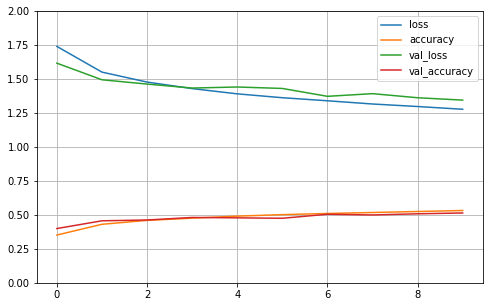

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_nadam.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.2184 - accuracy: 0.5524


[1.2184346914291382, 0.5524285435676575]

In [ ]:
model_nadam.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.3354 - accuracy: 0.5176


[1.3353993892669678, 0.5176249742507935]

### Multilayer Perceptron with Poisson loss function

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_poisson = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_poisson.compile(loss="poisson",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model_poisson.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 4s 3ms/step - loss: 7.4025 - accuracy: 0.1184 - val_loss: 7.4516 - val_accuracy: 0.1190
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 7.3977 - accuracy: 0.1228 - val_loss: 7.4506 - val_accuracy: 0.1216
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 7.3971 - accuracy: 0.1223 - val_loss: 7.4503 - val_accuracy: 0.1166
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 7.3969 - accuracy: 0.1220 - val_loss: 7.4502 - val_accuracy: 0.1166
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 7.3968 - accuracy: 0.1222 - val_loss: 7.4501 - val_accuracy: 0.1164
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 7.3968 - accuracy: 0.1217 - val_loss: 7.4500 - val_accuracy: 0.1184
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 7.3967 - accuracy: 0.1217 - val_loss: 7.4500 - val_accuracy:

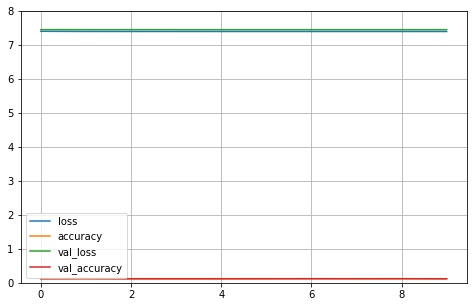

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 8)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_poisson.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 7.3966 - accuracy: 0.1217


[7.396622180938721, 0.12165714055299759]

In [ ]:
model_poisson.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 7.4033 - accuracy: 0.1270


[7.403292655944824, 0.12700000405311584]

### Multilayer Perceptron with one additional layer

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_morelayer = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_morelayer.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model_morelayer.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.9412 - accuracy: 0.2704 - val_loss: 1.8544 - val_accuracy: 0.3214
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.8156 - accuracy: 0.3491 - val_loss: 1.7662 - val_accuracy: 0.3696
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7504 - accuracy: 0.3754 - val_loss: 1.7143 - val_accuracy: 0.3784
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7051 - accuracy: 0.3913 - val_loss: 1.6714 - val_accuracy: 0.4004
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6715 - accuracy: 0.4023 - val_loss: 1.6490 - val_accuracy: 0.4068
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6443 - accuracy: 0.4113 - val_loss: 1.6295 - val_accuracy: 0.4068
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6223 - accuracy: 0.4171 - val_loss: 1.5995 - val_accuracy:

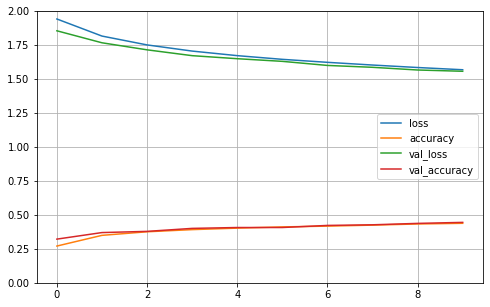

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_morelayer.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.5581 - accuracy: 0.4439


[1.5580933094024658, 0.4438571333885193]

In [ ]:
model_morelayer.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.5613 - accuracy: 0.4405


[1.5613263845443726, 0.4404999911785126]

### Multilayer Perceptron with one less layer and high number of neurons

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_lesslayer = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_lesslayer.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model_lesslayer.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.9060 - accuracy: 0.2843 - val_loss: 1.8141 - val_accuracy: 0.3410
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7742 - accuracy: 0.3619 - val_loss: 1.7314 - val_accuracy: 0.3886
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7214 - accuracy: 0.3843 - val_loss: 1.6926 - val_accuracy: 0.3998
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6881 - accuracy: 0.3994 - val_loss: 1.6629 - val_accuracy: 0.4154
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6630 - accuracy: 0.4099 - val_loss: 1.6418 - val_accuracy: 0.4178
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6418 - accuracy: 0.4182 - val_loss: 1.6267 - val_accuracy: 0.4208
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6245 - accuracy: 0.4217 - val_loss: 1.6077 - val_accuracy:

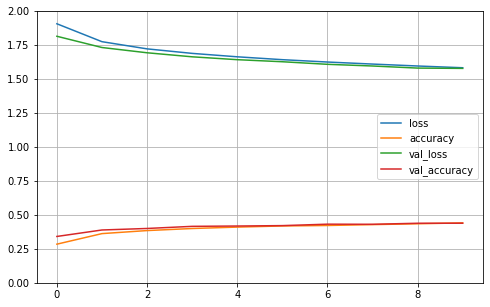

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_lesslayer.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.5795 - accuracy: 0.4413


[1.5794553756713867, 0.4413142800331116]

In [ ]:
model_lesslayer.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.5799 - accuracy: 0.4342


[1.579924464225769, 0.43424999713897705]

### Multilayer Perceptron with one less layer and low number of neurons

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_lesslayer1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model_lesslayer1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model_lesslayer1.fit(smaller_train_imgs, smaller_train_labels, epochs=10,
                    validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.9435 - accuracy: 0.2641 - val_loss: 1.8417 - val_accuracy: 0.3254
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.8079 - accuracy: 0.3478 - val_loss: 1.7579 - val_accuracy: 0.3750
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7519 - accuracy: 0.3736 - val_loss: 1.7180 - val_accuracy: 0.3898
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7173 - accuracy: 0.3847 - val_loss: 1.6881 - val_accuracy: 0.3972
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6914 - accuracy: 0.3947 - val_loss: 1.6675 - val_accuracy: 0.3984
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6698 - accuracy: 0.4030 - val_loss: 1.6507 - val_accuracy: 0.4114
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6518 - accuracy: 0.4102 - val_loss: 1.6319 - val_accuracy:

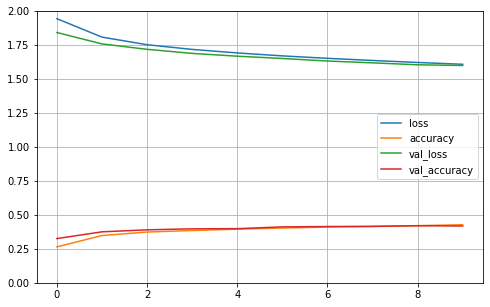

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_lesslayer1.evaluate(smaller_train_imgs,smaller_train_labels)

1094/1094 [==============================] - 3s 2ms/step - loss: 1.6032 - accuracy: 0.4270


[1.6032049655914307, 0.426971435546875]

In [ ]:
model_lesslayer1.evaluate(test_imgs,test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.6004 - accuracy: 0.4241


[1.600421667098999, 0.42412498593330383]

## Image Prediction with most accurate Multilayer Perceptron model

The MLP model that ended up with the highest accuracy for the test dataset was the model where the Nadam optimizer was used

In [ ]:
new_images = test_imgs[:10]
image_proba = model_nadam.predict(new_images)
image_proba.round(2)

1/1 [==============================] - 0s 70ms/step


array([[0.17, 0.19, 0.04, 0.47, 0.02, 0.05, 0.05, 0.  ],
       [0.4 , 0.33, 0.05, 0.02, 0.01, 0.02, 0.  , 0.15],
       [0.  , 0.  , 0.06, 0.01, 0.56, 0.04, 0.3 , 0.02],
       [0.09, 0.04, 0.06, 0.25, 0.05, 0.07, 0.41, 0.03],
       [0.08, 0.45, 0.02, 0.38, 0.  , 0.06, 0.01, 0.  ],
       [0.01, 0.02, 0.17, 0.06, 0.06, 0.01, 0.66, 0.  ],
       [0.08, 0.  , 0.13, 0.2 , 0.23, 0.14, 0.04, 0.17],
       [0.01, 0.97, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.48, 0.04, 0.1 , 0.15, 0.07, 0.07, 0.08, 0.01],
       [0.01, 0.05, 0.09, 0.09, 0.08, 0.19, 0.37, 0.13]], dtype=float32)

In [ ]:
classes_image_pred=np.argmax(image_proba,axis=1)
classes_image_pred

array([3, 0, 4, 6, 1, 6, 4, 1, 0, 6])

In [ ]:
np.array(class_names)[classes_image_pred]

array(['cat', 'airplane', 'deer', 'frog', 'car', 'frog', 'deer', 'car',
       'airplane', 'frog'], dtype='<U8')

This shows the images of the new images with their predicted labels.

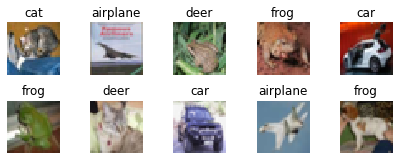

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(new_images):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[int(classes_image_pred[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

This shows the images of the new images with their actual labels.

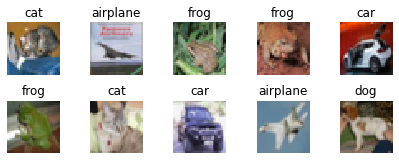

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(new_images):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[int(test_labels[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

As shown in the two images, the most accurate MLP model got the right label in seven out of the ten new images

## Experiments with Convolutional Neural Network Model

### Convolutional Neural Networks

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

To standardized the different datasets which means setting the mean to 0 and std to 1

In [ ]:
smaller_train_imgs_mean = smaller_train_imgs.mean(axis=0, keepdims=True)
smaller_train_imgs_std = smaller_train_imgs.std(axis=0, keepdims=True) + 1e-7
smaller_train_imgs = (smaller_train_imgs - smaller_train_imgs_mean) / smaller_train_imgs_std
valid_imgs = (valid_imgs - smaller_train_imgs_mean) / smaller_train_imgs_std
test_imgs = (test_imgs - smaller_train_imgs_mean) / smaller_train_imgs_std

#smaller_train_imgs = smaller_train_imgs[..., np.newaxis]
#valid_imgs = valid_imgs[..., np.newaxis]
#test_imgs = test_imgs[..., np.newaxis]

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 


Epoch 1/15
1094/1094 [==============================] - 13s 10ms/step - loss: 1.7120 - accuracy: 0.3415 - val_loss: 1.3244 - val_accuracy: 0.5264
Epoch 2/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2731 - accuracy: 0.5391 - val_loss: 1.0502 - val_accuracy: 0.6178
Epoch 3/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0847 - accuracy: 0.6161 - val_loss: 0.9390 - val_accuracy: 0.6584
Epoch 4/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.9710 - accuracy: 0.6594 - val_loss: 0.8792 - val_accuracy: 0.6882
Epoch 5/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8696 - accuracy: 0.7010 - val_loss: 0.8514 - val_accuracy: 0.7022
Epoch 6/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7935 - accuracy: 0.7303 - val_loss: 0.7947 - val_accuracy: 0.7340
Epoch 7/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7296 - accuracy: 0.7538 - val_loss: 0.7646 - val_a

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         2

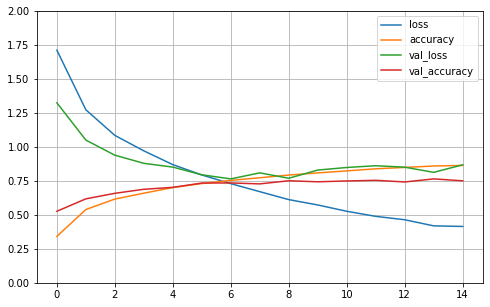

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.2774 - accuracy: 0.9073


[0.27744749188423157, 0.9072856903076172]

In [ ]:
model.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 0.8720 - accuracy: 0.7506


[0.8720248937606812, 0.7506250143051147]

### Convolutional Neural Networks with more Epochs

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_epochs = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_epochs.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_epochs.fit(smaller_train_imgs, smaller_train_labels, epochs=20, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/20
1094/1094 [==============================] - 12s 9ms/step - loss: 1.7413 - accuracy: 0.3266 - val_loss: 1.4205 - val_accuracy: 0.4718
Epoch 2/20
1094/1094 [==============================] - 10s 9ms/step - loss: 1.3042 - accuracy: 0.5232 - val_loss: 1.1151 - val_accuracy: 0.5892
Epoch 3/20
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1043 - accuracy: 0.6040 - val_loss: 0.9512 - val_accuracy: 0.6560
Epoch 4/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.9818 - accuracy: 0.6549 - val_loss: 0.8550 - val_accuracy: 0.6904
Epoch 5/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8775 - accuracy: 0.6931 - val_loss: 0.8908 - val_accuracy: 0.6922
Epoch 6/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7935 - accuracy: 0.7284 - val_loss: 0.8003 - val_accuracy: 0.7286
Epoch 7/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7230 - accuracy: 0.7512 - val_loss: 0.7931 - val_ac

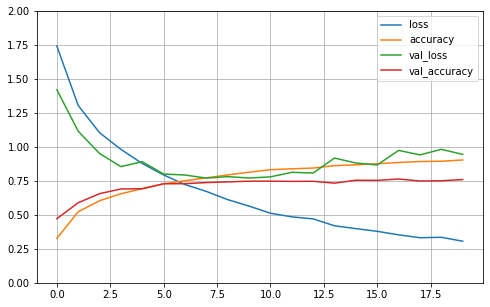

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_epochs.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.1699 - accuracy: 0.9465


[0.1699056178331375, 0.946485698223114]

In [ ]:
model_cnn_epochs.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 0.9949 - accuracy: 0.7577


[0.9949037432670593, 0.7577499747276306]

### Convolutional Neural Networks with Leaky RELU and weight initializer

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_LeakyRELU = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_LeakyRELU.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_LeakyRELU.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 12s 9ms/step - loss: 1.5304 - accuracy: 0.4267 - val_loss: 1.1231 - val_accuracy: 0.5878
Epoch 2/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0887 - accuracy: 0.6097 - val_loss: 0.8946 - val_accuracy: 0.6812
Epoch 3/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.9017 - accuracy: 0.6806 - val_loss: 0.8611 - val_accuracy: 0.6842
Epoch 4/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7769 - accuracy: 0.7305 - val_loss: 0.7653 - val_accuracy: 0.7352
Epoch 5/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6805 - accuracy: 0.7638 - val_loss: 0.7880 - val_accuracy: 0.7310
Epoch 6/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6028 - accuracy: 0.7938 - val_loss: 0.7746 - val_accuracy: 0.7394
Epoch 7/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5230 - accuracy: 0.8197 - val_loss: 0.7364 - val_ac

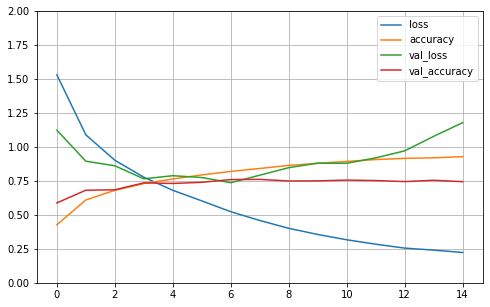

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_LeakyRELU.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.1101 - accuracy: 0.9643


[0.11008107662200928, 0.9643428325653076]

In [ ]:
model_cnn_LeakyRELU.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 1.1683 - accuracy: 0.7450


[1.1682651042938232, 0.7450000047683716]

### Convolutional Neural Networks with PRELU and weight initializer

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_PRELU = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_PRELU.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_PRELU.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 12s 10ms/step - loss: 1.7088 - accuracy: 0.3415 - val_loss: 1.2922 - val_accuracy: 0.5144
Epoch 2/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2327 - accuracy: 0.5489 - val_loss: 1.0258 - val_accuracy: 0.6246
Epoch 3/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0253 - accuracy: 0.6319 - val_loss: 0.9388 - val_accuracy: 0.6480
Epoch 4/15
1094/1094 [==============================] - 10s 10ms/step - loss: 0.8895 - accuracy: 0.6906 - val_loss: 0.8154 - val_accuracy: 0.7028
Epoch 5/15
1094/1094 [==============================] - 12s 11ms/step - loss: 0.7841 - accuracy: 0.7260 - val_loss: 0.7732 - val_accuracy: 0.7252
Epoch 6/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6994 - accuracy: 0.7573 - val_loss: 0.7925 - val_accuracy: 0.7182
Epoch 7/15
1094/1094 [==============================] - 10s 10ms/step - loss: 0.6119 - accuracy: 0.7883 - val_loss: 0.7670 - va

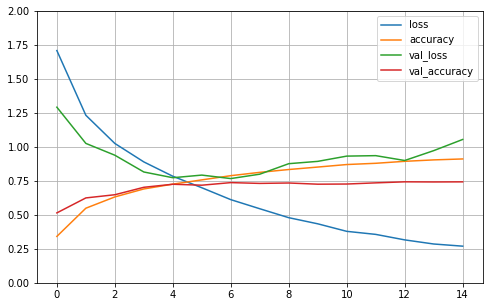

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_PRELU.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.1440 - accuracy: 0.9516


[0.14403241872787476, 0.9516000151634216]

In [ ]:
model_cnn_PRELU.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 1.1105 - accuracy: 0.7401


[1.1104947328567505, 0.7401250004768372]

### Convolutional Neural Networks with SELU and weight initializer

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_SELU = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, kernel_initializer="lecun_normal",activation="selu",),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_SELU.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_SELU.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 12s 9ms/step - loss: 1.4478 - accuracy: 0.4609 - val_loss: 1.0859 - val_accuracy: 0.6108
Epoch 2/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0272 - accuracy: 0.6328 - val_loss: 0.9130 - val_accuracy: 0.6728
Epoch 3/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8697 - accuracy: 0.6933 - val_loss: 0.9115 - val_accuracy: 0.6780
Epoch 4/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7501 - accuracy: 0.7429 - val_loss: 0.7471 - val_accuracy: 0.7368
Epoch 5/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6540 - accuracy: 0.7767 - val_loss: 0.7527 - val_accuracy: 0.7358
Epoch 6/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5690 - accuracy: 0.8053 - val_loss: 0.7382 - val_accuracy: 0.7448
Epoch 7/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5024 - accuracy: 0.8275 - val_loss: 0.7214 - val_ac

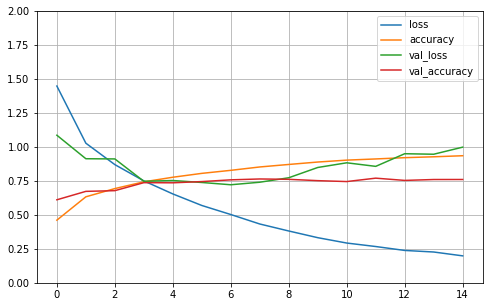

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_SELU.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.0936 - accuracy: 0.9686


[0.0936313346028328, 0.9685714244842529]

In [ ]:
model_cnn_SELU.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 1.0719 - accuracy: 0.7464


[1.0718700885772705, 0.7463750243186951]

### Convolutional Neural Networks with SGD optimizer

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_sgd = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_sgd.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model_cnn_sgd.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 9s 8ms/step - loss: 1.9070 - accuracy: 0.2535 - val_loss: 1.6380 - val_accuracy: 0.3562
Epoch 2/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.6292 - accuracy: 0.3912 - val_loss: 1.4385 - val_accuracy: 0.4840
Epoch 3/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.4624 - accuracy: 0.4644 - val_loss: 1.2719 - val_accuracy: 0.5272
Epoch 4/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.3456 - accuracy: 0.5089 - val_loss: 1.1562 - val_accuracy: 0.5768
Epoch 5/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.2521 - accuracy: 0.5495 - val_loss: 1.1598 - val_accuracy: 0.5802
Epoch 6/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1700 - accuracy: 0.5828 - val_loss: 1.0034 - val_accuracy: 0.6372
Epoch 7/15
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0999 - accuracy: 0.6091 - val_loss: 0.9597 - val_accuracy:

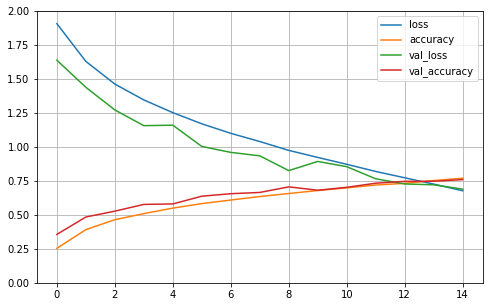

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_sgd.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.4711 - accuracy: 0.8359


[0.47113481163978577, 0.8359428644180298]

In [ ]:
model_cnn_sgd.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 0.7183 - accuracy: 0.7504


[0.7182537913322449, 0.750374972820282]

### Convolutional Neural Networks with poisson loss function 

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_poisson = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_poisson.compile(loss="poisson", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_poisson.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 12s 10ms/step - loss: 7.3965 - accuracy: 0.1220 - val_loss: 7.4496 - val_accuracy: 0.1270
Epoch 2/15
1094/1094 [==============================] - 10s 9ms/step - loss: 7.3964 - accuracy: 0.1237 - val_loss: 7.4496 - val_accuracy: 0.1270
Epoch 3/15
1094/1094 [==============================] - 10s 9ms/step - loss: 7.3964 - accuracy: 0.1251 - val_loss: 7.4496 - val_accuracy: 0.1270
Epoch 4/15
1094/1094 [==============================] - 10s 9ms/step - loss: 7.3964 - accuracy: 0.1231 - val_loss: 7.4496 - val_accuracy: 0.1290
Epoch 5/15
1094/1094 [==============================] - 10s 9ms/step - loss: 7.3964 - accuracy: 0.1239 - val_loss: 7.4496 - val_accuracy: 0.1154
Epoch 6/15
1094/1094 [==============================] - 10s 9ms/step - loss: 7.3964 - accuracy: 0.1287 - val_loss: 7.4496 - val_accuracy: 0.1218
Epoch 7/15
1094/1094 [==============================] - 10s 9ms/step - loss: 7.3964 - accuracy: 0.1296 - val_loss: 7.4496 - val_a

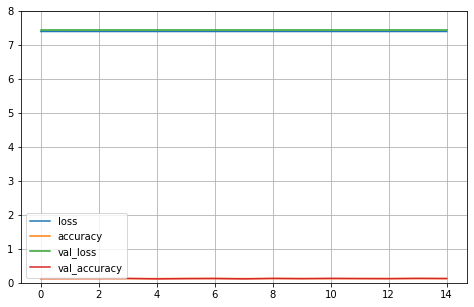

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 8)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_poisson.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 7.3964 - accuracy: 0.1250


[7.396389961242676, 0.1250285655260086]

In [ ]:
model_cnn_poisson.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 7.4030 - accuracy: 0.1250


[7.403038024902344, 0.125]

### Convolutional Neural Networks with one additional layer

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_morelayer = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_morelayer.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_morelayer.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 13s 10ms/step - loss: 2.0552 - accuracy: 0.1579 - val_loss: 1.7657 - val_accuracy: 0.2814
Epoch 2/15
1094/1094 [==============================] - 11s 10ms/step - loss: 1.6954 - accuracy: 0.3460 - val_loss: 1.4567 - val_accuracy: 0.4558
Epoch 3/15
1094/1094 [==============================] - 11s 10ms/step - loss: 1.4392 - accuracy: 0.4729 - val_loss: 1.2669 - val_accuracy: 0.5336
Epoch 4/15
1094/1094 [==============================] - 11s 10ms/step - loss: 1.2839 - accuracy: 0.5377 - val_loss: 1.1586 - val_accuracy: 0.5824
Epoch 5/15
1094/1094 [==============================] - 11s 10ms/step - loss: 1.1801 - accuracy: 0.5817 - val_loss: 1.0759 - val_accuracy: 0.6060
Epoch 6/15
1094/1094 [==============================] - 11s 10ms/step - loss: 1.1137 - accuracy: 0.6075 - val_loss: 1.0555 - val_accuracy: 0.6240
Epoch 7/15
1094/1094 [==============================] - 11s 10ms/step - loss: 1.0565 - accuracy: 0.6275 - val_loss: 1.0138 -

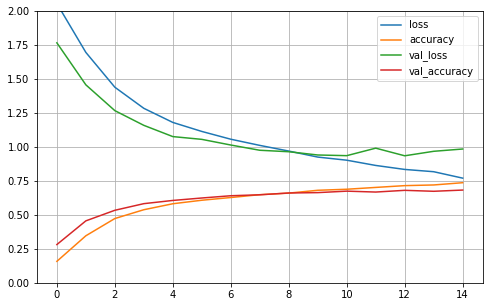

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_morelayer.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 5s 4ms/step - loss: 0.6252 - accuracy: 0.7806


[0.6252360939979553, 0.7805714011192322]

In [ ]:
model_cnn_morelayer.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 0.9813 - accuracy: 0.6869


[0.9812650084495544, 0.6868749856948853]

### Convolutional Neural Networks with one less layer and High number of neurons

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_lesslayer = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_lesslayer.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_lesslayer.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 11s 9ms/step - loss: 1.4704 - accuracy: 0.4516 - val_loss: 1.0913 - val_accuracy: 0.6008
Epoch 2/15
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0126 - accuracy: 0.6390 - val_loss: 0.8757 - val_accuracy: 0.6770
Epoch 3/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8217 - accuracy: 0.7106 - val_loss: 0.8053 - val_accuracy: 0.7108
Epoch 4/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7006 - accuracy: 0.7533 - val_loss: 0.7265 - val_accuracy: 0.7506
Epoch 5/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6046 - accuracy: 0.7923 - val_loss: 0.7392 - val_accuracy: 0.7428
Epoch 6/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5282 - accuracy: 0.8156 - val_loss: 0.7202 - val_accuracy: 0.7564
Epoch 7/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.4565 - accuracy: 0.8395 - val_loss: 0.7322 - val_ac

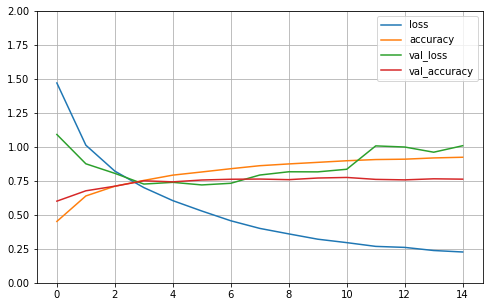

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_lesslayer.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.1281 - accuracy: 0.9566


[0.1280643343925476, 0.95660001039505]

In [ ]:
model_cnn_lesslayer.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 1.0468 - accuracy: 0.7582


[1.0468242168426514, 0.7582499980926514]

### Convolutional Neural Networks with one less layer and Low number of neurons

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_cnn_lesslayer1 = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
model_cnn_lesslayer1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_cnn_lesslayer1.fit(smaller_train_imgs, smaller_train_labels, epochs=15, validation_data=(valid_imgs, valid_labels))

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

Epoch 1/15
1094/1094 [==============================] - 11s 9ms/step - loss: 1.5113 - accuracy: 0.4364 - val_loss: 1.2022 - val_accuracy: 0.5580
Epoch 2/15
1094/1094 [==============================] - 9s 9ms/step - loss: 1.0931 - accuracy: 0.6083 - val_loss: 0.9089 - val_accuracy: 0.6794
Epoch 3/15
1094/1094 [==============================] - 9s 9ms/step - loss: 0.8999 - accuracy: 0.6834 - val_loss: 0.8163 - val_accuracy: 0.7026
Epoch 4/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.7759 - accuracy: 0.7319 - val_loss: 0.7206 - val_accuracy: 0.7442
Epoch 5/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.6683 - accuracy: 0.7698 - val_loss: 0.6994 - val_accuracy: 0.7554
Epoch 6/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5796 - accuracy: 0.8005 - val_loss: 0.7133 - val_accuracy: 0.7644
Epoch 7/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.5109 - accuracy: 0.8214 - val_loss: 0.7335 - val_accu

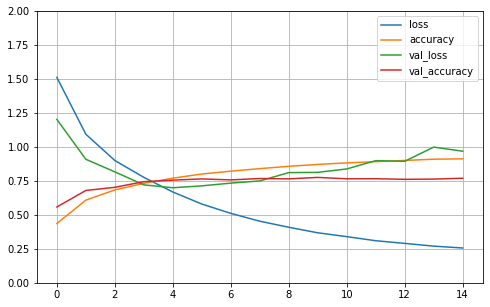

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model_cnn_lesslayer1.evaluate(smaller_train_imgs, smaller_train_labels)

1094/1094 [==============================] - 4s 4ms/step - loss: 0.1209 - accuracy: 0.9610


[0.12087412178516388, 0.9610285758972168]

In [ ]:
model_cnn_lesslayer1.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 0.9830 - accuracy: 0.7661


[0.9830318689346313, 0.7661250233650208]

## Image Prediction with most accurate Convolutional Neural Network model

In [ ]:
new_images = test_imgs[:10]
image_proba = model_cnn_lesslayer.predict(new_images)
image_proba.round(2)

1/1 [==============================] - 0s 180ms/step


array([[0.  , 0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.94, 0.  , 0.02, 0.  , 0.04, 0.  , 0.  ],
       [0.  , 0.  , 0.28, 0.09, 0.03, 0.  , 0.59, 0.  ],
       [0.  , 0.  , 0.  , 0.78, 0.  , 0.22, 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.96, 0.  , 0.01, 0.01, 0.  , 0.02, 0.  , 0.  ],
       [0.  , 0.  , 0.11, 0.1 , 0.05, 0.65, 0.08, 0.01]], dtype=float32)

In [ ]:
classes_image_pred=np.argmax(image_proba,axis=1)
classes_image_pred

array([3, 0, 6, 6, 1, 6, 3, 1, 0, 5])

In [ ]:
np.array(class_names)[classes_image_pred]

array(['cat', 'airplane', 'frog', 'frog', 'car', 'frog', 'cat', 'car',
       'airplane', 'dog'], dtype='<U8')

This shows the images of the new images with their predicted labels.

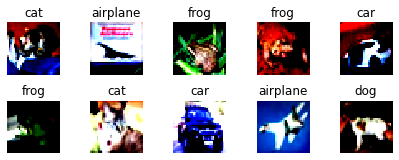

In [ ]:
plt.figure(figsize=(7.2, 2.4))
show_new_images = np.squeeze(new_images)
for index, image in enumerate(show_new_images):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[int(classes_image_pred[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

This shows the images of the new images with their actual labels.

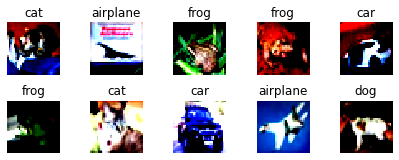

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(show_new_images):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[int(test_labels[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

As shown in the two images, the most accurate CNN model got the right label in all of the images